# <div style="background:#6903D5; color: white; font-size: 30px; text-align: center; width: auto; height: auto; padding:5px; margin:2px;text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:50px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Apple Quality Assessment</div>

<center>
<img src="https://i0.wp.com/post.healthline.com/wp-content/uploads/2021/06/apple-varieties-types-1296x728-header.jpg?w=1155&h=1528" alt="Image" style="width: auto; height: auto; border:solid 2px teal">
</center>

## <div style="background:#6903D5; color: white; font-size: 30px; text-align: left; width: auto; height: auto; padding:5px;; margin:2px; padding-left:20px; text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:30px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Dataset Description</div>

<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px;; margin:2px;border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as: <br><br>
  

A_id: Unique identifier for each fruit <br>

Size: Size of the fruit<br>

Weight: Weight of the fruit<br>

Sweetness: Degree of sweetness of the fruit<br>

Crunchiness: Texture indicating the crunchiness of the fruit<br>

Juiciness: Level of juiciness of the fruit<br>

Ripeness: Stage of ripeness of the fruit<br>

Acidity: Acidity level of the fruit<br>

Quality: Overall quality of the fruit<br><br>
    
    
The dataset was generously provided by an American agriculture company. The data has been scaled and cleaned for ease of use.
</div>

## <div style="background:#6903D5; color: white; font-size: 30px; text-align: left; width: auto; height: auto; padding:5px;; margin:2px; padding-left:20px; text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:30px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;"> Importing Libraries</div>

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

warnings.filterwarnings('ignore')

## <div style="background:#6903D5; color: white; font-size: 30px; text-align: left; width: auto; height: auto; padding:5px;; margin:2px; padding-left:20px; text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:30px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Loading & Preprocessing Data</div>

In [2]:
# Loading dataset
df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
# Shape
df.shape

(4001, 9)

In [4]:
# Information about dataset
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [5]:
# Typecasting acidity from object to float 
def convert_acidity(acidity):
    try:
        return -float(acidity.replace('-', '')) if '-' in acidity else float(acidity)
    except ValueError:
        return np.nan


df['Acidity'] = df['Acidity'].apply(convert_acidity)

In [6]:
# Description
df.describe().drop('count').T.style.background_gradient(cmap='Purples_r')

,mean,std,min,25%,50%,75%,max
A_id,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [7]:
# Checking Null Data
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [8]:
# Dropping Null Values
df.dropna(inplace=True)

In [9]:
# Checking Duplicates 
df.duplicated().sum()

0

In [10]:
# Encoding Quality Feature
df['Quality'] = df['Quality'].map({"good":1, "bad":0})

In [11]:
# Dropping Useless Feature 
df.drop(columns=['A_id'], axis=1, inplace=True)

## <div style="background:#6903D5; color: white; font-size: 30px; text-align: left; width: auto; height: auto; padding:5px;; margin:2px; padding-left:20px; text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:30px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Exploratory Data Analysis</div>

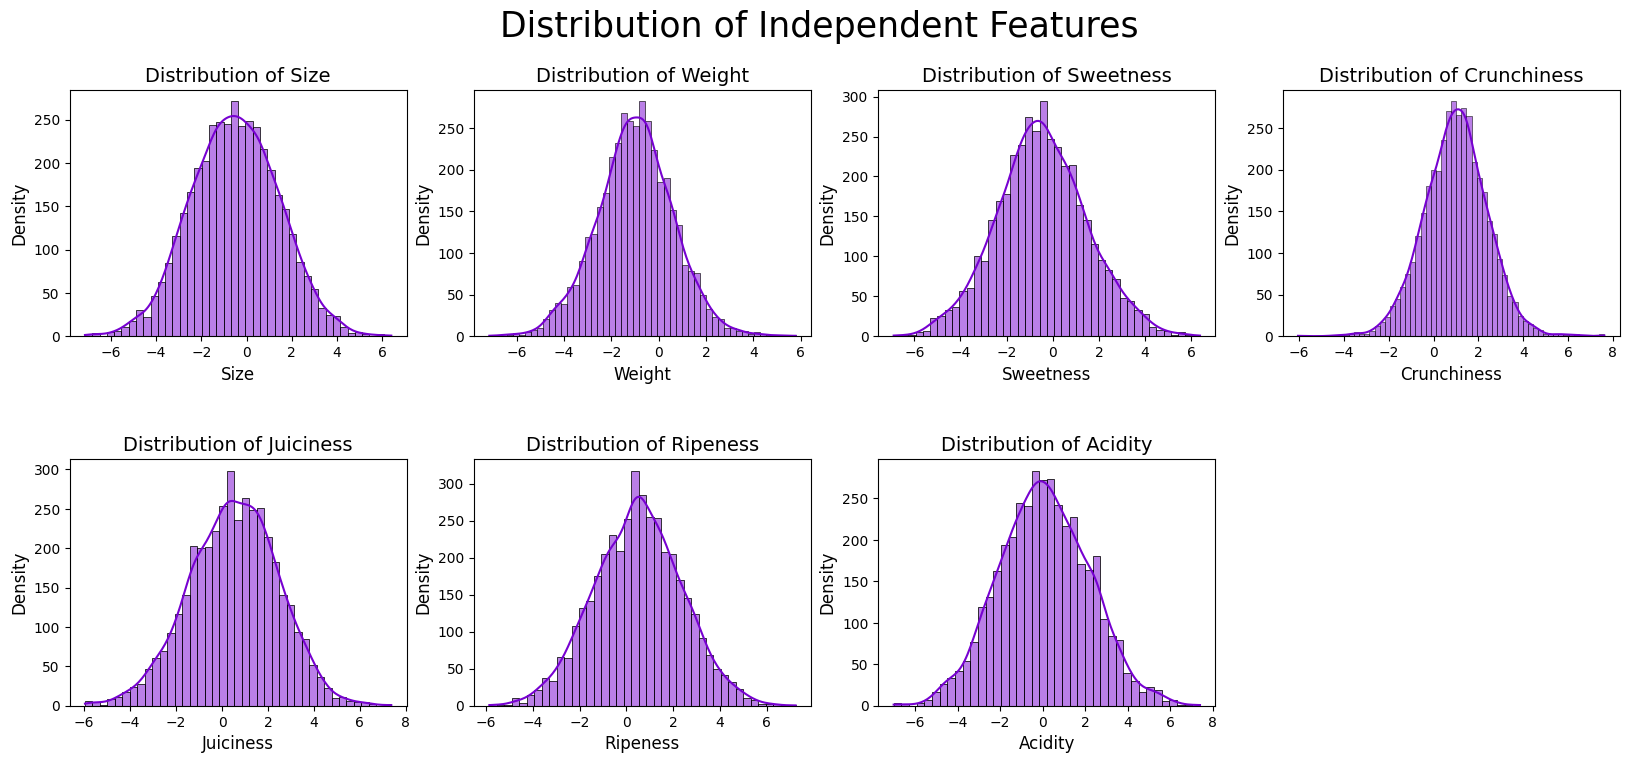

In [12]:
# Distribution of Independent Features
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(20,8))
axs = axs.flatten()

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']  # Replace with actual feature names from your dataset

# Plot KDE for each numerical feature
for i, col in enumerate(features):
    sns.histplot(df[col], ax=axs[i], kde=True, color="#7701D1")
    axs[i].set_title(f'Distribution of {col}', fontsize=14)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Density', fontsize=12)

plt.suptitle("Distribution of Independent Features", size=25)
plt.subplots_adjust(hspace=0.5)

for j in range(len(features), len(axs)):
    axs[j].set_visible(False)
    
plt.show()

<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px;; margin:2px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">
All the features: Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness & Acidity — look like they follow a normal distribution, with most values around the middle and fewer at the edges.</div

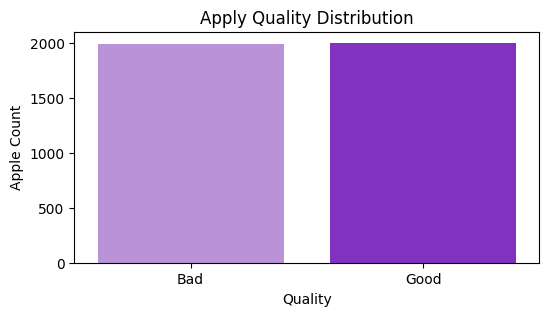

In [13]:
# Dependent Feature
plt.figure(figsize=(6,3))
colors = sns.light_palette("#7701D1", n_colors=10)
sns.countplot(data=df, x='Quality', palette=[colors[4],colors[8]])
plt.xticks(ticks=[0,1], labels=['Bad', 'Good'])
plt.ylabel("Apple Count")
plt.title('Apply Quality Distribution')
plt.show()

<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px; margin:2px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">We can clearly see that the dataset is balanced, with approximately the same number of good and bad quality apples.</div

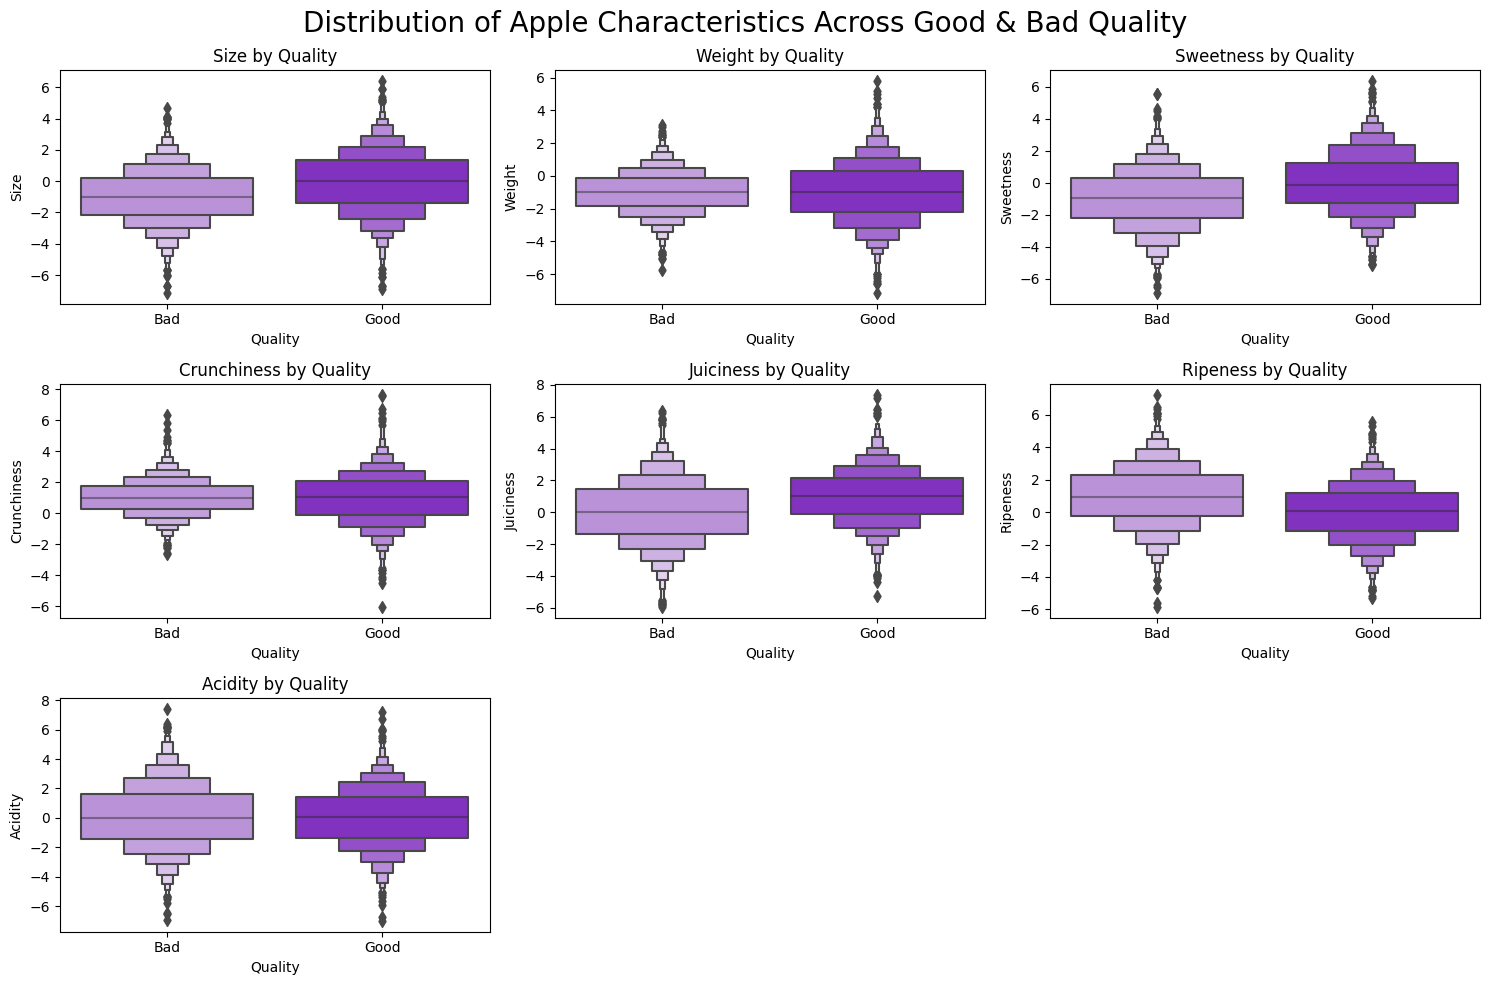

In [14]:
colors = sns.light_palette("#7701D1", n_colors=10)

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxenplot(x='Quality', y=column, data=df, palette=[colors[4],colors[8]])
    plt.xticks(ticks=[0,1], labels=['Bad', 'Good'])
    plt.title(f'{column} by Quality')
    
plt.suptitle("Distribution of Apple Characteristics Across Good & Bad Quality", size=20)
plt.tight_layout()
plt.show()

<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px; margin:2px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">  
    
* Bad-quality apples have lower Size, Sweetness, and Juiciness, but higher Crunchiness and Ripeness. 

* Good-quality apples show more balanced traits, with slightly better Juiciness and neutral values in other features, making them more desirable overall.</div>

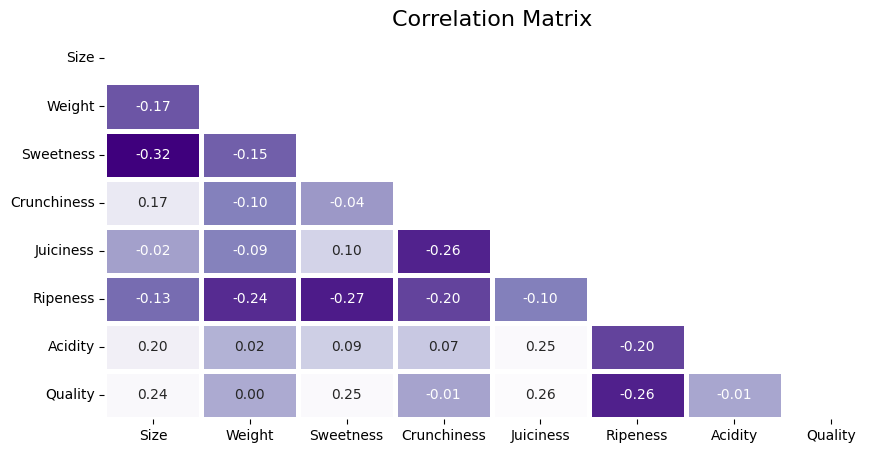

In [15]:
# Correlation matrix
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='Purples_r', fmt='.2f', linewidths=2.5, cbar=False)
plt.title("Correlation Matrix", size=16)
plt.show()


<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px; margin:2px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">  
    
Influence on Apple Quality:
<br>1. Size, Sweetness, and Juiciness positively correlate with better quality.
<br>2. Ripeness negatively impacts quality.
<br>3. Weight and Crunchiness have no significant effect on quality.
</div>

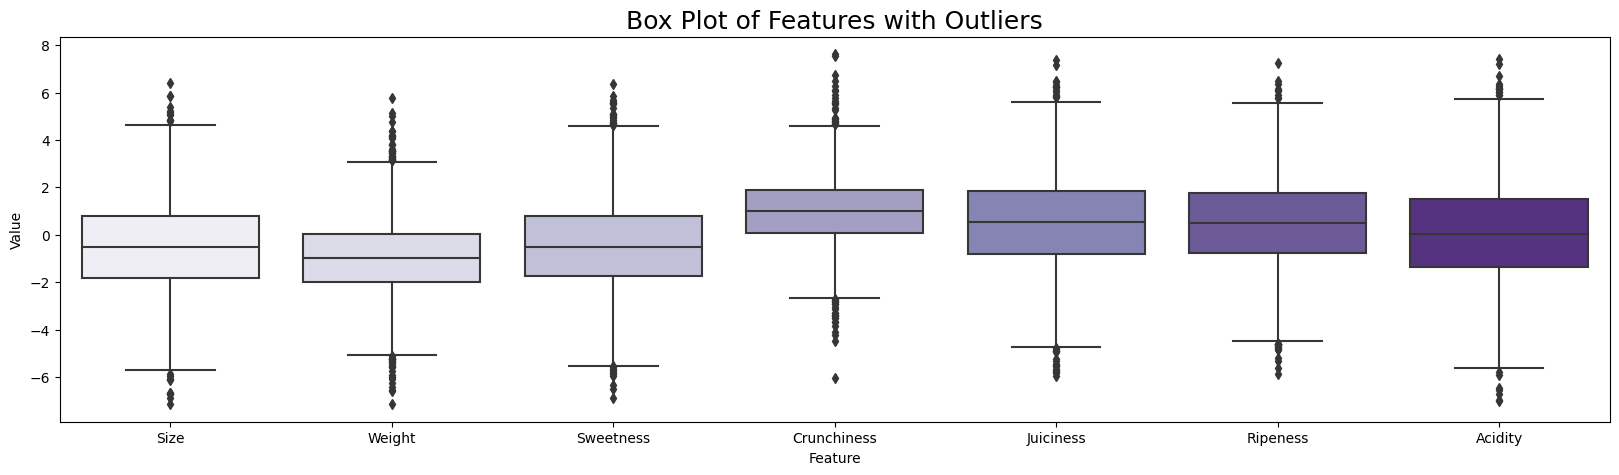

In [16]:
# Outlier Detection
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
df_melted = df[numerical_features].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(20, 5))
sns.boxplot(x='Feature', y='Value', data=df_melted, palette='Purples')
plt.title('Box Plot of Features with Outliers', size=18)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px; margin:2px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">We can clearly see that the dataset contains a significant number of outliers.</div>

## <div style="background:#6903D5; color: white; font-size: 30px; text-align: left; width: auto; height: auto; padding:5px;; margin:2px; padding-left:20px; text-shadow: 2px 2px 5px rgba(1, 1, 1, 0.4); border-radius:30px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">Model Training</div>

In [17]:
# Splitting Data into dependent & independent features
X = df.drop(columns=['Quality'], axis=1)
y = df['Quality']

# Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# Random Forest Classifier Training
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [19]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100), "%")

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       495
           1       0.90      0.90      0.90       505

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Accuracy Score: 90 %


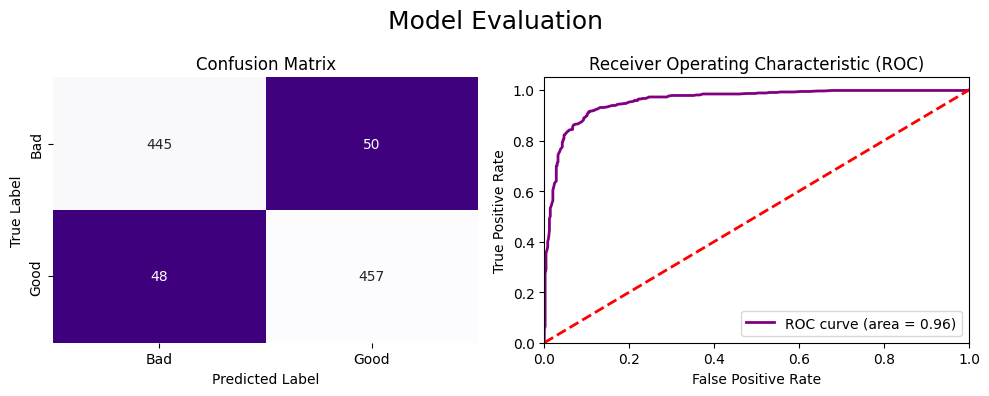

In [20]:
# Model Evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)

y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples_r', cbar=False, 
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'], ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix')

# Plot ROC Curve
axs[1].plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC)')
axs[1].legend(loc='lower right')

plt.suptitle("Model Evaluation", size=18)
plt.tight_layout()
plt.show()

<div style="background:#6399FD; color: white; font-size: 16px; width: auto; height: auto; padding:5px; margin:2px; border-radius:5px; @import url('https://fonts.googleapis.com/css2?family=Akaya+Telivigala&display=swap'); font-family: 'Akaya Telivigala', cursive;">In summary, the model achieves a high accuracy of 90% in classifying apple quality. Both classes, "Bad Quality" and "Good Quality," have balanced performance metrics with a precision, recall, and F1-score of 90%, indicating that the model performs well in distinguishing between the two quality categories.</div>